<a href="https://colab.research.google.com/github/KiarashVaziri/E4-Data-Analysis/blob/main/BVP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BVP signal processing
Author: Kiarash Vaziri \\
Supervisor: Maryam Mirian \\
Summer 2022

# Packages

In [ ]:
!pip install heartpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#%% PACKAGES
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import butter, filtfilt, lfilter, iirnotch, resample
from scipy.stats import pearsonr 
import heartpy as hp

plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams.update({'font.size':18})

# Functions

In [ ]:
#%% FUNCTIONS

def butter_bandpass_filter(data, lowcut, highcut, sRate, order=4):
    nyq = 0.5 * sRate
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='bandpass')
    y = filtfilt(b, a, data)
    return y

def notch_filter(signal, fs, filter_range=[50, 60]):
    for f0 in filter_range:  # Frequency to be removed from signal (Hz)
        Q = 30.0  # Quality factor
        w0 = f0 / (fs / 2)  # Normalized Frequency
        b, a = iirnotch(w0, Q)
        for i in range(signal.shape[-1]):
            signal[:, i] = lfilter(b, a, signal[:, i])

    return signal

def resample_frequency(signal, seg_len, new_fs, old_fs):
    """
    Resample the signal to a new frequency and keeping the time fixed
    args:
        signal (np.array): ecg signal
        seg_len (int): length of the signal in seconds
        new_fs (int): frequency after resampling
        old_fs (int): frequency before resampling
    returns:
        resampled signal (np.array)
    """
    if seg_len is None:
        num = int(len(signal) / old_fs * new_fs)
    else:
        num = int(seg_len * new_fs)
    return resample(signal, num=num)

# Load Data

In [ ]:
!pwd
%cd /content/drive/MyDrive/Colab\ Notebooks/DMCBH/OH02
!pwd

/content
/content/drive/MyDrive/Colab Notebooks/DMCBH/OH02
/content/drive/MyDrive/Colab Notebooks/DMCBH/OH02


In [ ]:
#%% LOAD DATA

# LOAD PPG/BVP SIGNAL
df = pd.read_csv(f"BVP_modified.csv")
data = df['BVP']

init_time = data[0]
fs_bvp = data[1]
bvp = data[2:]

# LOAD ACCELEROMETER DATA
df = pd.read_csv(f"ACC.csv")
keys = df.keys()

acc_x = df[keys[0]]
acc_y = df[keys[1]]
acc_z = df[keys[2]]
fs_acc = acc_x[0]
acc_x = np.array(acc_x[1:])
acc_y = np.array(acc_y[1:])
acc_z = np.array(acc_z[1:])
acc = np.vstack((acc_x, acc_y, acc_z))

dt = 1/fs_bvp
sample_no = bvp.shape[0]

endtime = sample_no * dt
t = np.linspace(0, endtime, sample_no)

#LOAD TABLE
df = pd.read_csv("Table.csv")
sbp = df['SBP']
dbp = df['DBP']
hr = df['HR']

# Find tags

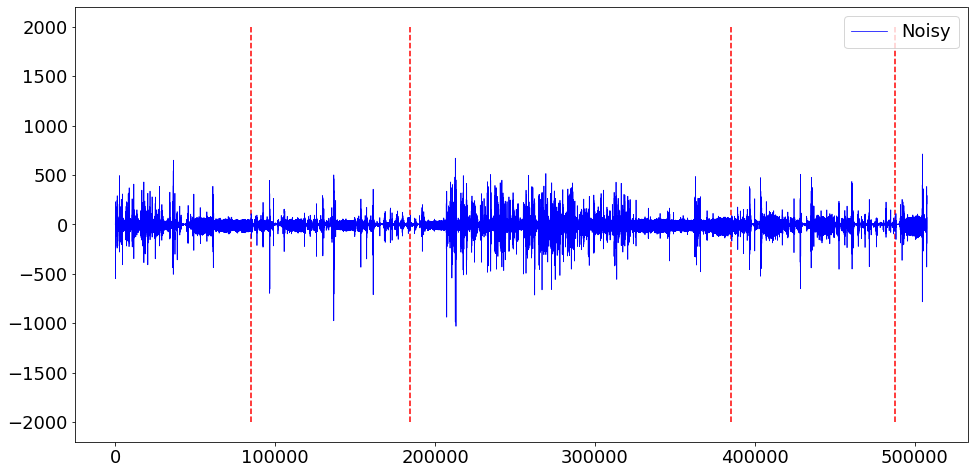

In [ ]:
#%% FINDING TAGS

df = pd.read_csv("tags_modified.csv")
keys = df.keys()

tags = np.array(df[keys[0]])
inds = []
for i in range(len(tags)):
    inds.append(64 * (tags[i] - init_time))

#inds = [int(i)+64*40 for i in inds]
inds = [int(i) for i in inds]

plt.figure()
plt.plot(bvp, color='b', linewidth=0.75, label='Noisy')
plt.legend()
plt.vlines(x = [inds[0], inds[17], inds[18], inds[-1]], ymin=-2000, ymax=2000, colors = 'red', ls='--')


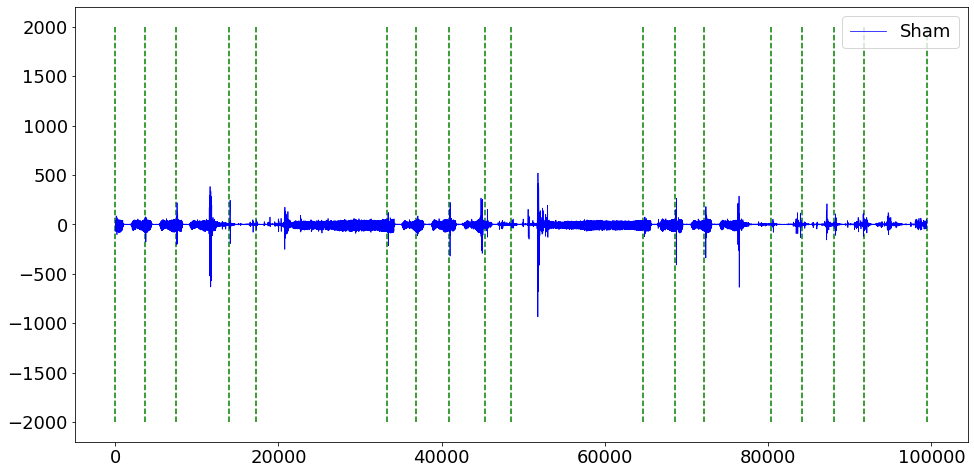

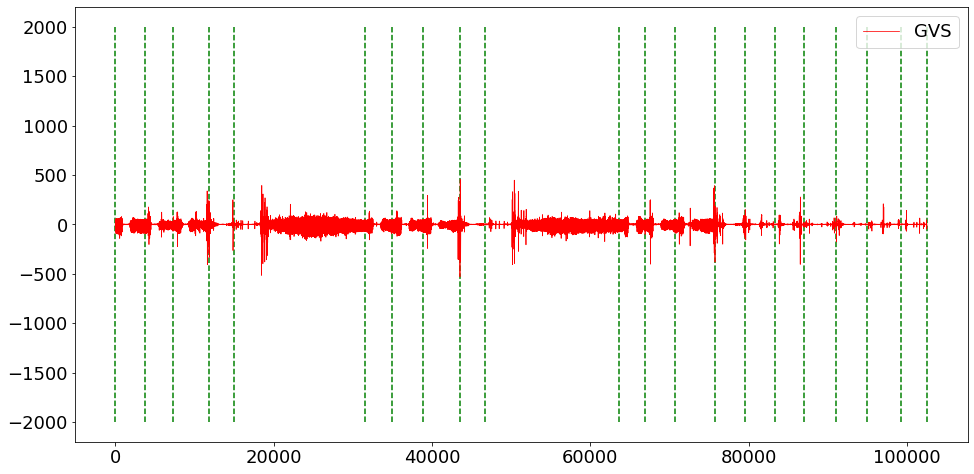

In [ ]:
#%% EXTRACT SHAM AND GVS PORTIONS OF RECORDED SIGNAL
sham = bvp[inds[0]:inds[17]]
gvs = bvp[inds[18]:inds[-1]]
sham_f = butter_bandpass_filter(sham, 0.5, 5, fs_bvp)
gvs_f = butter_bandpass_filter(gvs, 0.5, 5, fs_bvp)

plt.figure(1)
plt.plot(sham_f, color='b', linewidth=0.75, label='Sham'); plt.legend()
plt.vlines(x = [inds[k]-inds[0] for k in range(18)], ymin=-2000, ymax=2000, colors = 'green', ls='--')

plt.figure(2)
plt.plot(gvs_f, color='red', linewidth=0.75, label='GVS'); plt.legend()
plt.vlines(x = [inds[k]-inds[18] for k in range(18, 39)], ymin=-2000, ymax=2000, colors = 'green', ls='--')


For tag number 0:


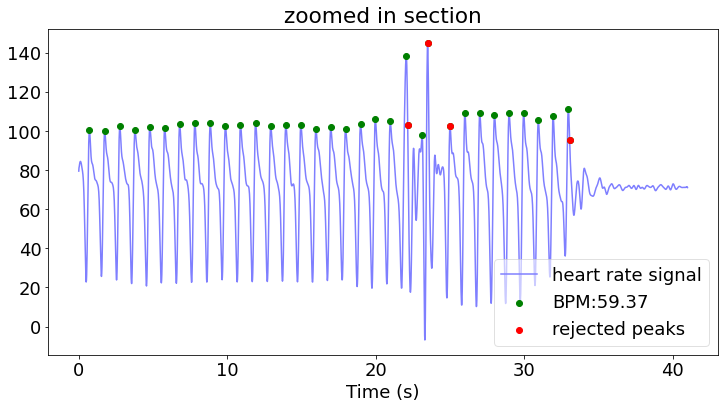

bpm: 59.370514
ibi: 1010.602679
sdnn: 19.161032
sdsd: 15.808830
rmssd: 19.859028
pnn20: 0.076923
pnn50: 0.038462
hr_mad: 15.625000
sd1: 13.939199
sd2: 19.786151
s: 866.460976
sd1/sd2: 0.704493
breathingrate: 0.282805
For tag number 1:


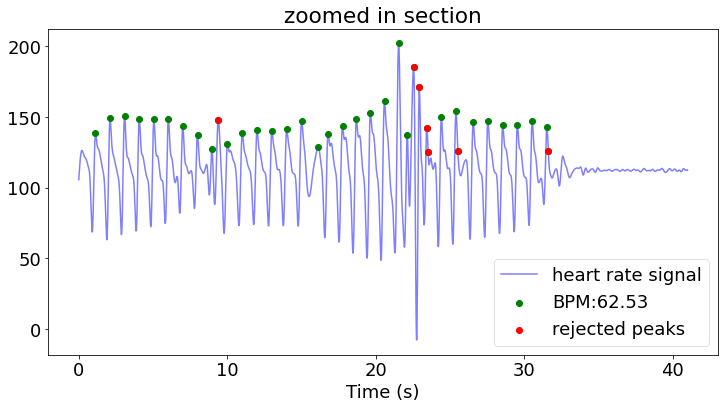

bpm: 62.533172
ibi: 959.490741
sdnn: 100.297883
sdsd: 122.640629
rmssd: 137.957798
pnn20: 0.347826
pnn50: 0.173913
hr_mad: 15.625000
sd1: 96.551077
sd2: 86.544220
s: 26250.952577
sd1/sd2: 1.115627
breathingrate: 0.193073
For tag number 2:


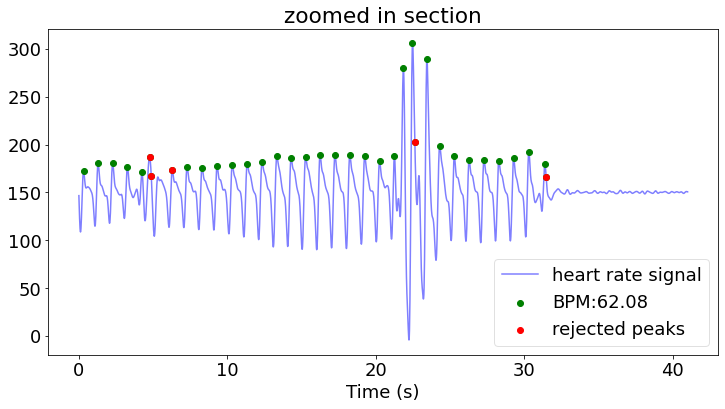

bpm: 62.078522
ibi: 966.517857
sdnn: 103.872619
sdsd: 77.646032
rmssd: 82.797758
pnn20: 0.200000
pnn50: 0.080000
hr_mad: 15.625000
sd1: 58.306169
sd2: 121.151700
s: 22191.869700
sd1/sd2: 0.481266
breathingrate: 0.147842
For tag number 3:


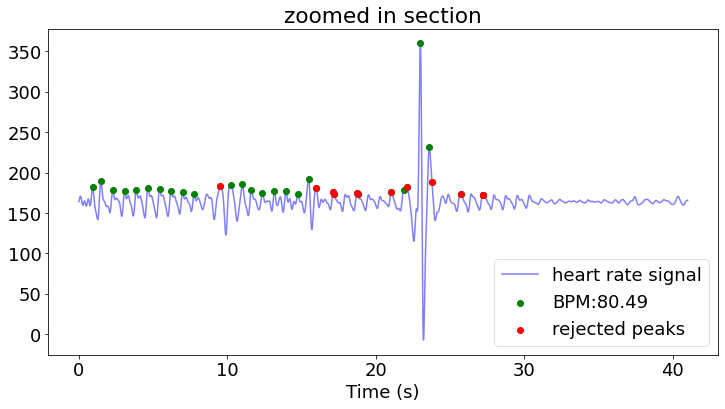

bpm: 80.493218
ibi: 745.404412
sdnn: 76.314444
sdsd: 69.483850
rmssd: 90.532588
pnn20: 0.428571
pnn50: 0.357143
hr_mad: 15.625000
sd1: 63.527899
sd2: 60.329829
s: 12040.553847
sd1/sd2: 1.053010
breathingrate: 0.236911
For tag number 4:


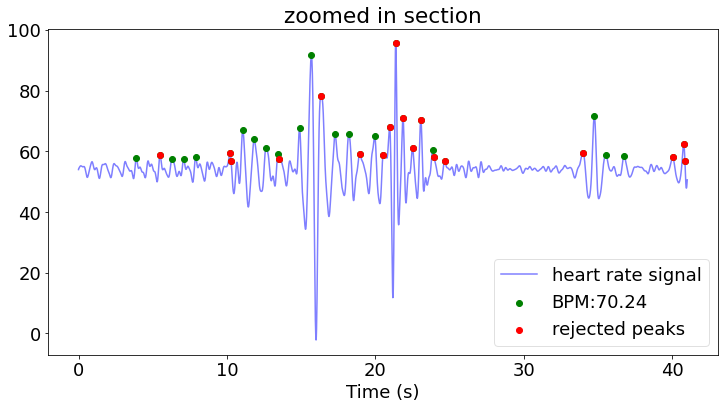

bpm: 70.243902
ibi: 854.166667
sdnn: 135.816717
sdsd: 176.258034
rmssd: 220.694483
pnn20: 0.750000
pnn50: 0.250000
hr_mad: 15.625000
sd1: 128.609982
sd2: 124.633251
s: 50356.840324
sd1/sd2: 1.031907
breathingrate: 0.130174
For tag number 5:


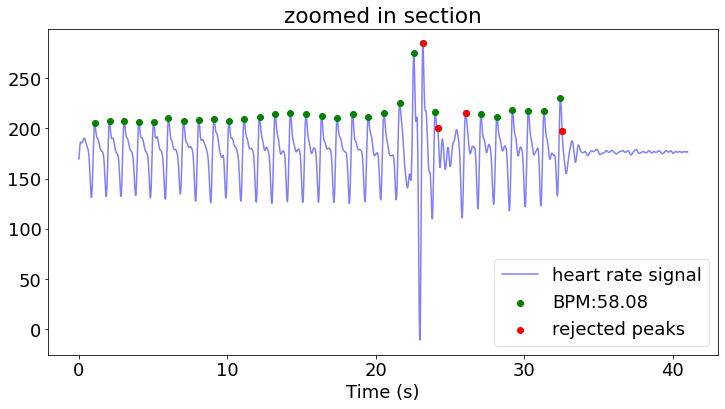

bpm: 58.080279
ibi: 1033.052885
sdnn: 33.379072
sdsd: 23.210343
rmssd: 30.757843
pnn20: 0.250000
pnn50: 0.083333
hr_mad: 23.437500
sd1: 21.744207
sd2: 36.081455
s: 2464.776181
sd1/sd2: 0.602642
breathingrate: 0.148998
For tag number 7:


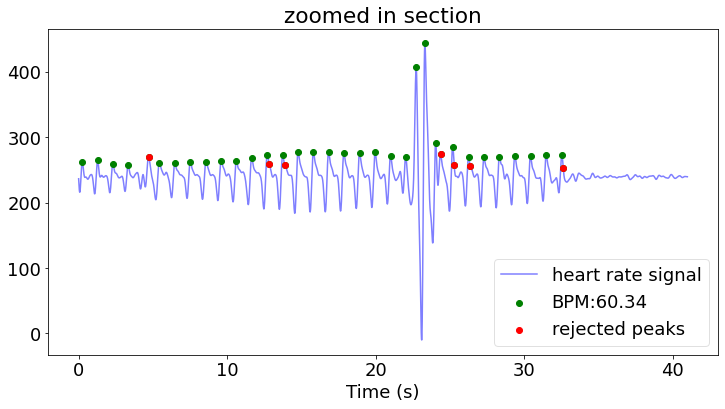

bpm: 60.339409
ibi: 994.375000
sdnn: 121.343392
sdsd: 69.304351
rmssd: 79.012813
pnn20: 0.333333
pnn50: 0.142857
hr_mad: 15.625000
sd1: 54.767161
sd2: 166.257603
s: 28605.636698
sd1/sd2: 0.329411
breathingrate: 0.160992
For tag number 8:


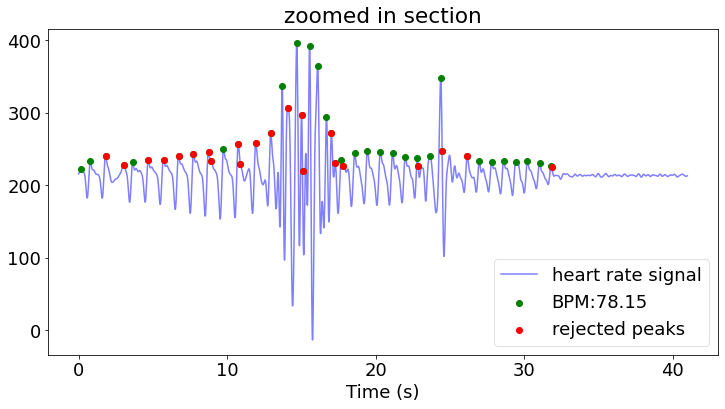

bpm: 78.154681
ibi: 767.708333
sdnn: 102.040807
sdsd: 19.764235
rmssd: 36.975499
pnn20: 0.700000
pnn50: 0.100000
hr_mad: 31.250000
sd1: 26.052081
sd2: 114.585701
s: 9378.269778
sd1/sd2: 0.227359
breathingrate: 0.173762
For tag number 9:


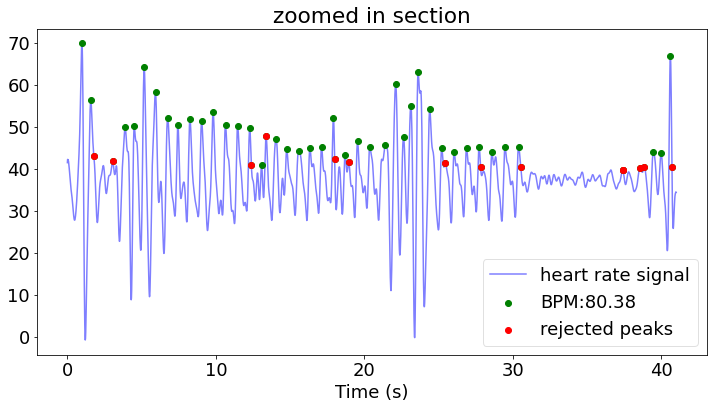

bpm: 80.378123
ibi: 746.471774
sdnn: 127.106103
sdsd: 91.551830
rmssd: 122.492759
pnn20: 0.708333
pnn50: 0.458333
hr_mad: 62.500000
sd1: 85.965855
sd2: 159.040165
s: 42951.929454
sd1/sd2: 0.540529
breathingrate: 0.172980
For tag number 10:


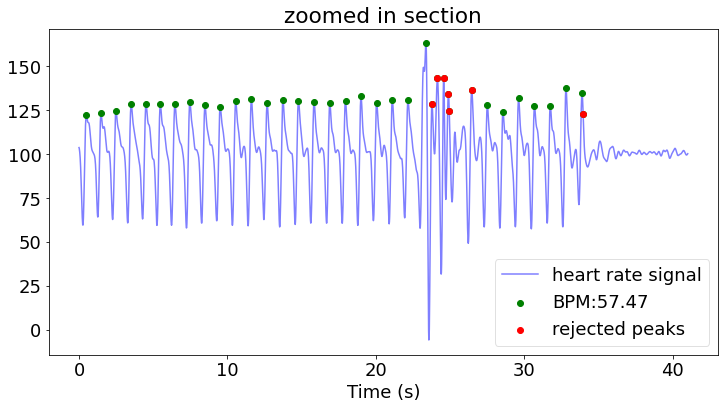

bpm: 57.466595
ibi: 1044.084821
sdnn: 42.186171
sdsd: 28.726967
rmssd: 35.604118
pnn20: 0.230769
pnn50: 0.038462
hr_mad: 15.625000
sd1: 24.355630
sd2: 44.885431
s: 3434.429743
sd1/sd2: 0.542618
breathingrate: 0.205339
For tag number 11:


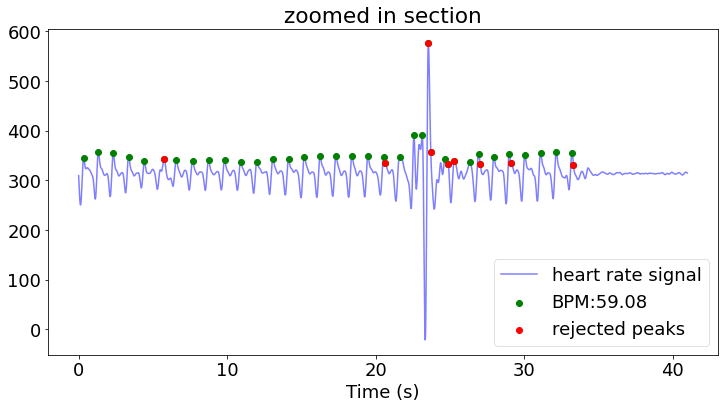

bpm: 59.076923
ibi: 1015.625000
sdnn: 135.991369
sdsd: 87.690799
rmssd: 93.387610
pnn20: 0.111111
pnn50: 0.055556
hr_mad: 15.625000
sd1: 64.508268
sd2: 104.001968
s: 21076.903717
sd1/sd2: 0.620260
breathingrate: 0.082085
For tag number 12:


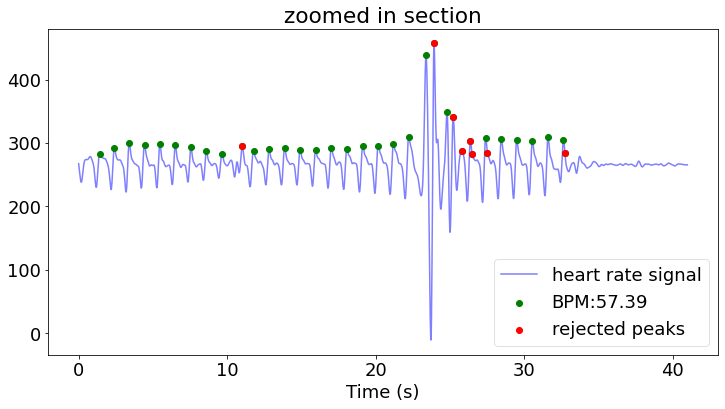

bpm: 57.387914
ibi: 1045.516304
sdnn: 31.893192
sdsd: 31.093357
rmssd: 33.511892
pnn20: 0.150000
pnn50: 0.050000
hr_mad: 0.000000
sd1: 22.750343
sd2: 28.038060
s: 2003.944969
sd1/sd2: 0.811409
breathingrate: 0.208056
For tag number 13:


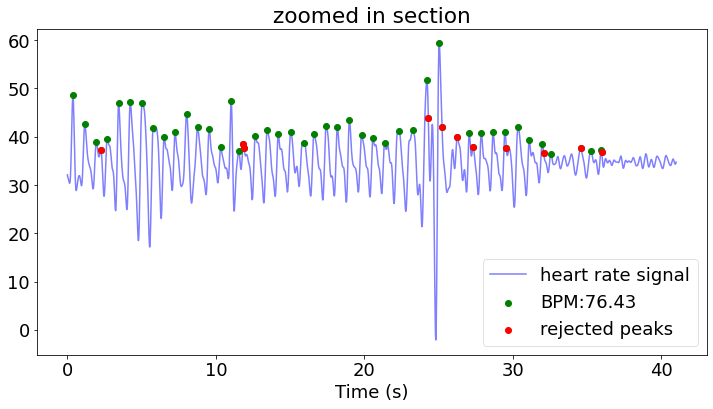

bpm: 76.429433
ibi: 785.037879
sdnn: 84.715424
sdsd: 63.588978
rmssd: 92.046640
pnn20: 0.740741
pnn50: 0.444444
hr_mad: 31.250000
sd1: 65.085517
sd2: 90.756905
s: 18557.262290
sd1/sd2: 0.717141
breathingrate: 0.231741
For tag number 14:


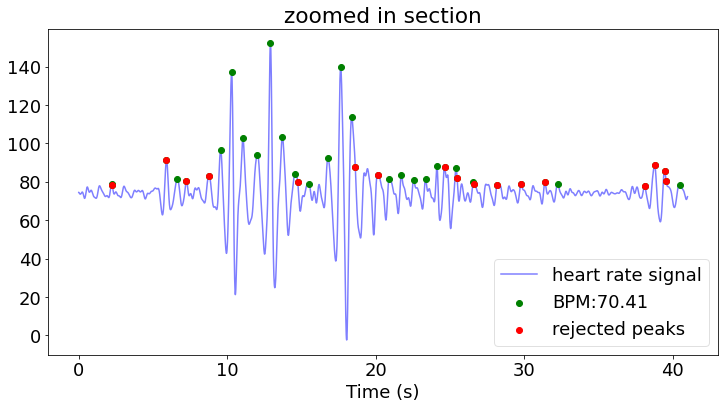

bpm: 70.409027
ibi: 852.163462
sdnn: 134.357583
sdsd: 113.278556
rmssd: 155.309670
pnn20: 0.900000
pnn50: 0.500000
hr_mad: 46.875000
sd1: 105.373221
sd2: 118.048917
s: 39078.882394
sd1/sd2: 0.892623
breathingrate: 0.270954
For tag number 15:


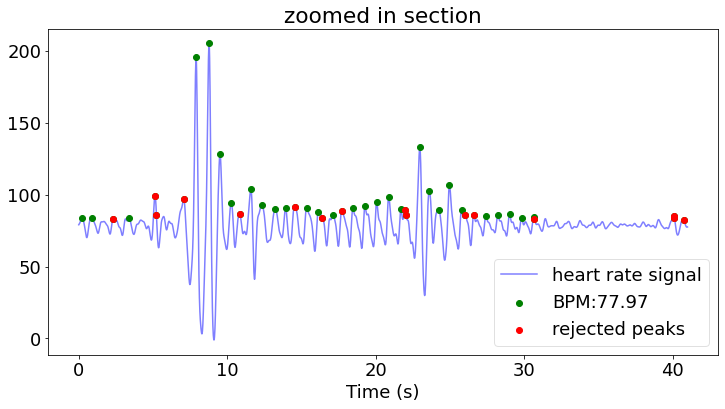

bpm: 77.969543
ibi: 769.531250
sdnn: 75.077271
sdsd: 73.896280
rmssd: 99.954918
pnn20: 0.538462
pnn50: 0.384615
hr_mad: 39.062500
sd1: 70.596996
sd2: 78.906959
s: 17500.538113
sd1/sd2: 0.894687
breathingrate: 0.195033
For tag number 16:


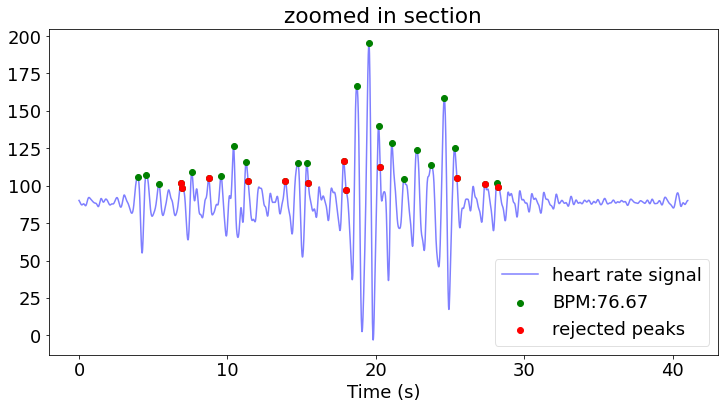

bpm: 76.672213
ibi: 782.552083
sdnn: 117.699979
sdsd: 86.392868
rmssd: 151.949754
pnn20: 0.857143
pnn50: 0.714286
hr_mad: 46.875000
sd1: 107.398319
sd2: 111.182227
s: 37513.080111
sd1/sd2: 0.965967
breathingrate: 0.106564
For tag number 17:


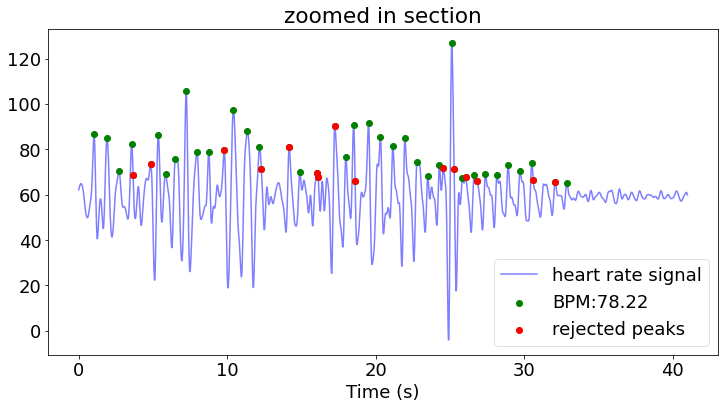

bpm: 78.215325
ibi: 767.113095
sdnn: 102.392415
sdsd: 45.951552
rmssd: 79.262552
pnn20: 0.866667
pnn50: 0.533333
hr_mad: 46.875000
sd1: 55.560981
sd2: 98.837646
s: 17252.107954
sd1/sd2: 0.562144
breathingrate: 0.186347
For tag number 18:


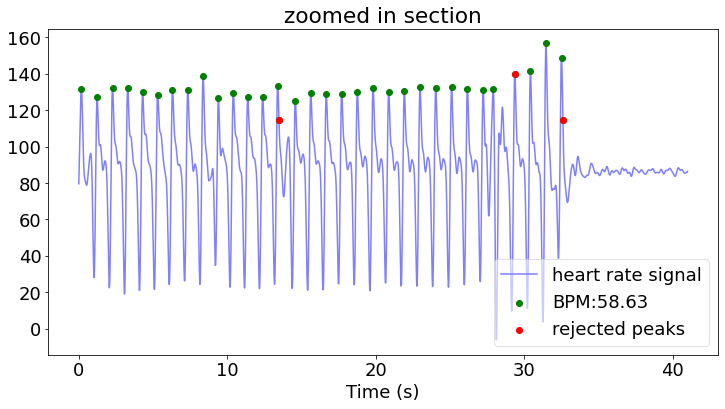

bpm: 58.625954
ibi: 1023.437500
sdnn: 69.061288
sdsd: 72.078516
rmssd: 77.371365
pnn20: 0.280000
pnn50: 0.040000
hr_mad: 23.437500
sd1: 53.582588
sd2: 54.921819
s: 9245.246087
sd1/sd2: 0.975616
breathingrate: 0.104741
For tag number 19:


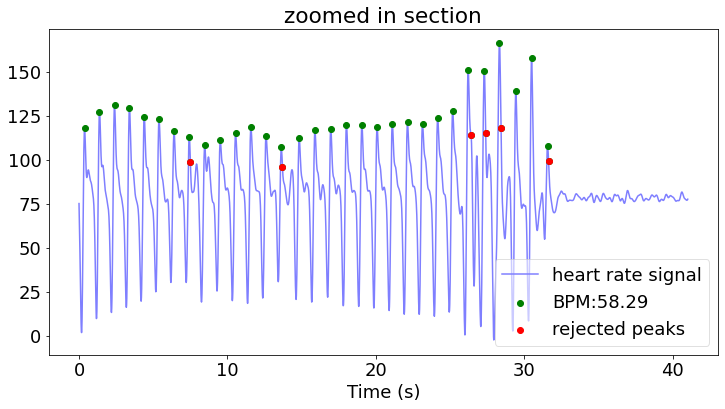

bpm: 58.287796
ibi: 1029.375000
sdnn: 22.238059
sdsd: 10.309826
rmssd: 13.638618
pnn20: 0.095238
pnn50: 0.000000
hr_mad: 15.625000
sd1: 9.643959
sd2: 27.819820
s: 842.867992
sd1/sd2: 0.346658
breathingrate: 0.155497
For tag number 20:


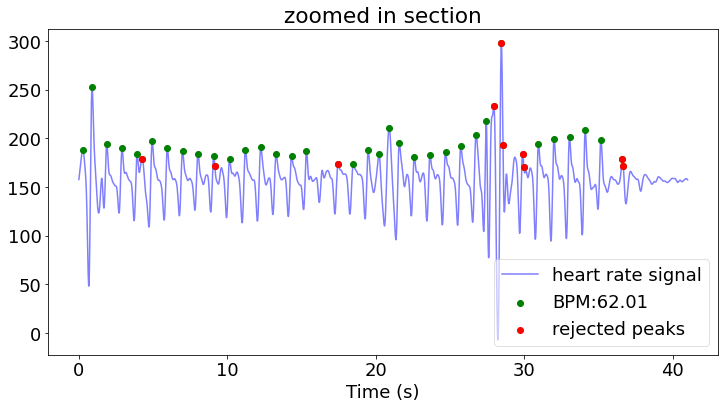

bpm: 62.009569
ibi: 967.592593
sdnn: 138.645137
sdsd: 117.144448
rmssd: 139.635089
pnn20: 0.409091
pnn50: 0.227273
hr_mad: 15.625000
sd1: 98.725423
sd2: 164.144724
s: 50910.317415
sd1/sd2: 0.601454
breathingrate: 0.153192
For tag number 23:


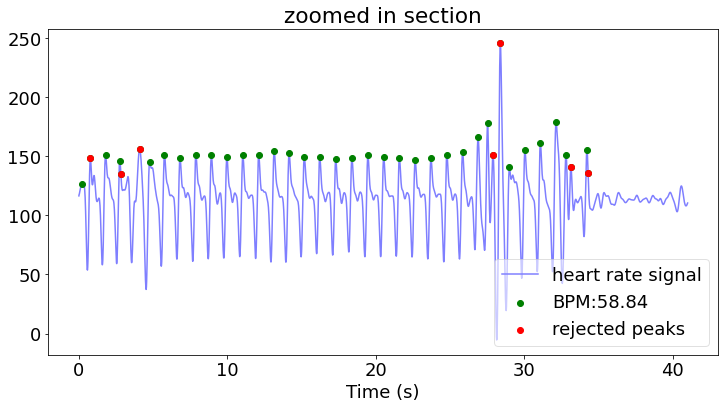

bpm: 58.842225
ibi: 1019.675926
sdnn: 106.789259
sdsd: 105.827819
rmssd: 117.663962
pnn20: 0.416667
pnn50: 0.083333
hr_mad: 15.625000
sd1: 80.338383
sd2: 81.625931
s: 20601.607530
sd1/sd2: 0.984226
breathingrate: 0.145354
For tag number 24:


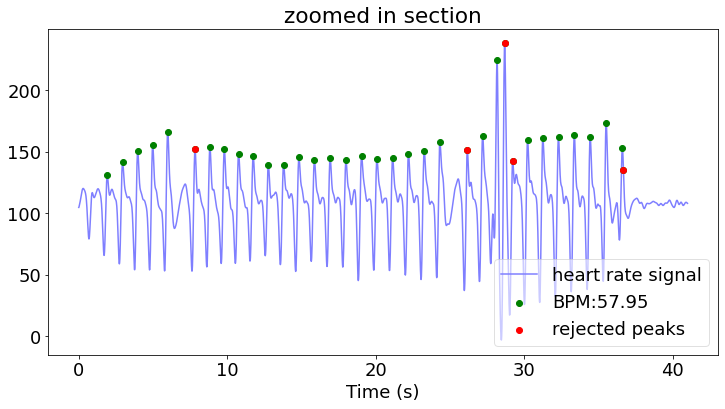

bpm: 57.945444
ibi: 1035.456731
sdnn: 33.161970
sdsd: 10.933810
rmssd: 15.265757
pnn20: 0.136364
pnn50: 0.000000
hr_mad: 15.625000
sd1: 10.206043
sd2: 42.462445
s: 1361.483059
sd1/sd2: 0.240355
breathingrate: 0.185811
For tag number 25:


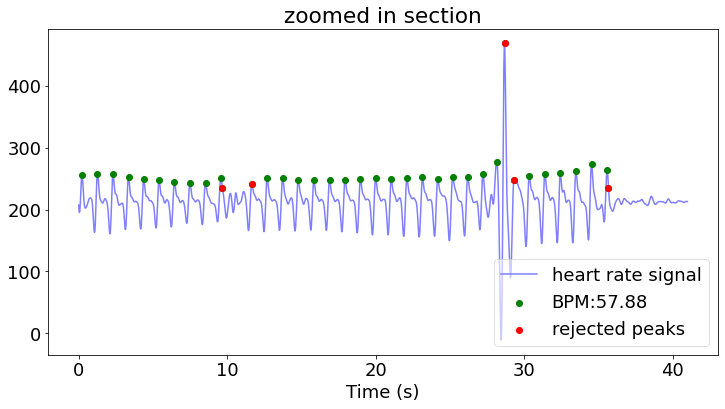

bpm: 57.879418
ibi: 1036.637931
sdnn: 26.362349
sdsd: 21.676309
rmssd: 28.582024
pnn20: 0.230769
pnn50: 0.038462
hr_mad: 15.625000
sd1: 19.845384
sd2: 24.385269
s: 1520.326730
sd1/sd2: 0.813827
breathingrate: 0.133333
For tag number 26:


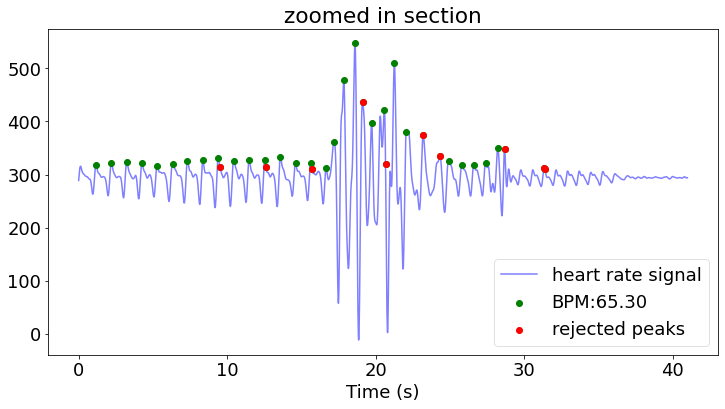

bpm: 65.295547
ibi: 918.898810
sdnn: 147.572987
sdsd: 34.795664
rmssd: 53.151254
pnn20: 0.642857
pnn50: 0.214286
hr_mad: 31.250000
sd1: 36.370917
sd2: 205.175094
s: 23443.840741
sd1/sd2: 0.177268
breathingrate: 0.155545
For tag number 27:


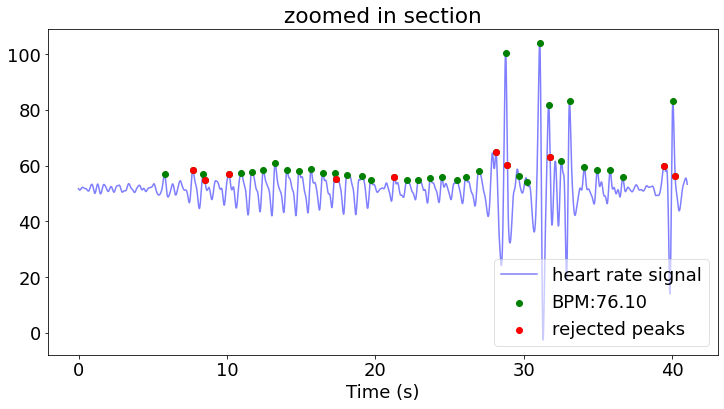

bpm: 76.102395
ibi: 788.411458
sdnn: 128.766430
sdsd: 155.638520
rmssd: 211.978123
pnn20: 0.684211
pnn50: 0.473684
hr_mad: 62.500000
sd1: 149.862966
sd2: 76.991430
s: 36248.211411
sd1/sd2: 1.946489
breathingrate: 0.264382
For tag number 28:


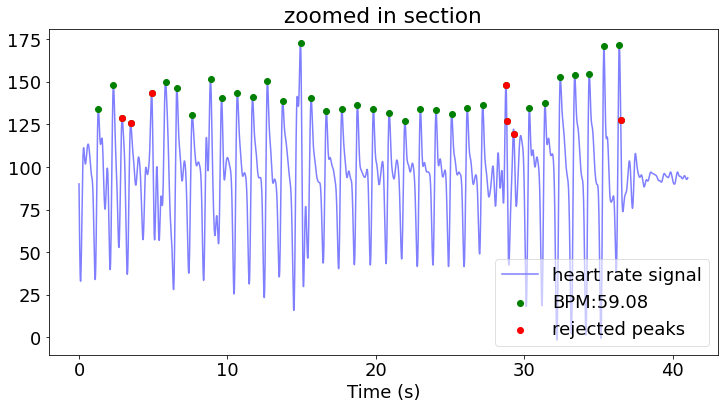

bpm: 59.076923
ibi: 1015.625000
sdnn: 108.494543
sdsd: 146.690043
rmssd: 180.033634
pnn20: 0.560000
pnn50: 0.320000
hr_mad: 31.250000
sd1: 127.130285
sd2: 86.776023
s: 34657.611926
sd1/sd2: 1.465039
breathingrate: 0.281452
For tag number 32:


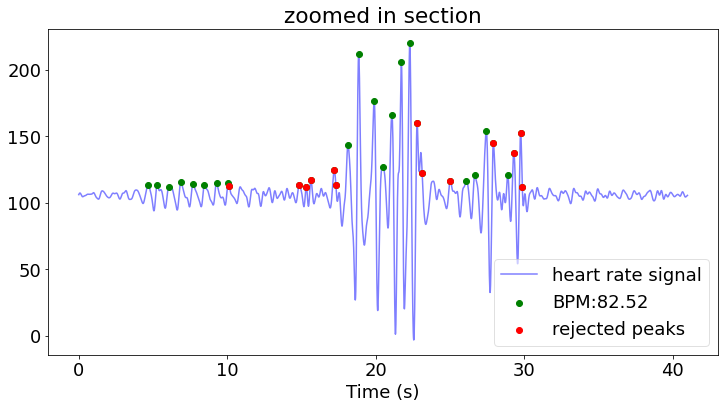

bpm: 82.521490
ibi: 727.083333
sdnn: 125.890922
sdsd: 134.386103
rmssd: 181.770087
pnn20: 0.750000
pnn50: 0.500000
hr_mad: 62.500000
sd1: 127.683861
sd2: 128.041873
s: 51361.523451
sd1/sd2: 0.997204
breathingrate: 0.275229
For tag number 35:


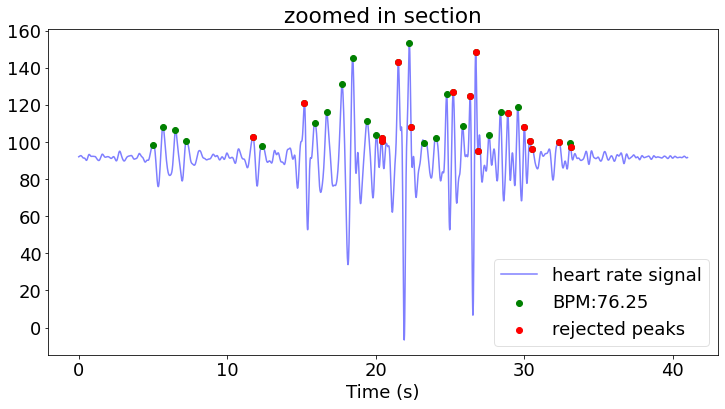

bpm: 76.245487
ibi: 786.931818
sdnn: 117.923395
sdsd: 101.899216
rmssd: 235.266163
pnn20: 1.000000
pnn50: 0.857143
hr_mad: 46.875000
sd1: 165.991004
sd2: 80.913254
s: 42194.329787
sd1/sd2: 2.051469
breathingrate: 0.231187


In [ ]:
data = {
    'bpm':[],
    'ibi':[],
    'sdnn':[],
    'sdsd':[],
    'rmssd':[],
    'pnn20':[],
    'pnn50':[],
    'hr_mad':[],
    'sd1':[],
    'sd2':[],
    's':[],
    'sd1/sd2':[],
    'breathingrate':[],
    'sbp':[],
    'dbp':[],
    'hr':[],
    'condition':[]    # 1 for standing and -1 for lying
}
all_ = [i for i in range(len(sbp))]
#lying = [0, 1, 2, 5, 6, 7, 10, 11, 12, 18, 19, 20, 23, 24, 25, 28, 29, 30]
lying = [i for i in range(0, 18)]
standing = list(set(all_) - set(lying))

w = 3000
outliers = [6, 21, 22, 29, 30, 31, 33, 34, 36, 37, 38]
count = 0
for tag in inds:
    if count in outliers:
      count+=1
      continue
    else:
      t_window = t[tag-w//2: tag+w//2]
      bvp_window = bvp[tag-w//2: tag+w//2]
      bvp_window_filtered = butter_bandpass_filter(bvp_window, 0.85, 3.5, fs_bvp)
      bvp_w_f_r = resample_frequency(bvp_window_filtered, None, 56, fs_bvp)
      print(f"For tag number {count}:")
      
      data['sbp'].append(sbp[count])
      data['dbp'].append(dbp[count])
      data['hr'].append(hr[count])
      data['condition'].append(1 if count in standing else -1)
      count += 1
      wd, m = hp.process(bvp_w_f_r, sample_rate = fs_bvp)
      hp.plotter(wd, m, title = 'zoomed in section', figsize=(12,6))
      plt.show()
      for measure in m.keys():
          data[measure].append(m[measure])
          print('%s: %f' %(measure, m[measure]))
      

## Correlation matrix of features

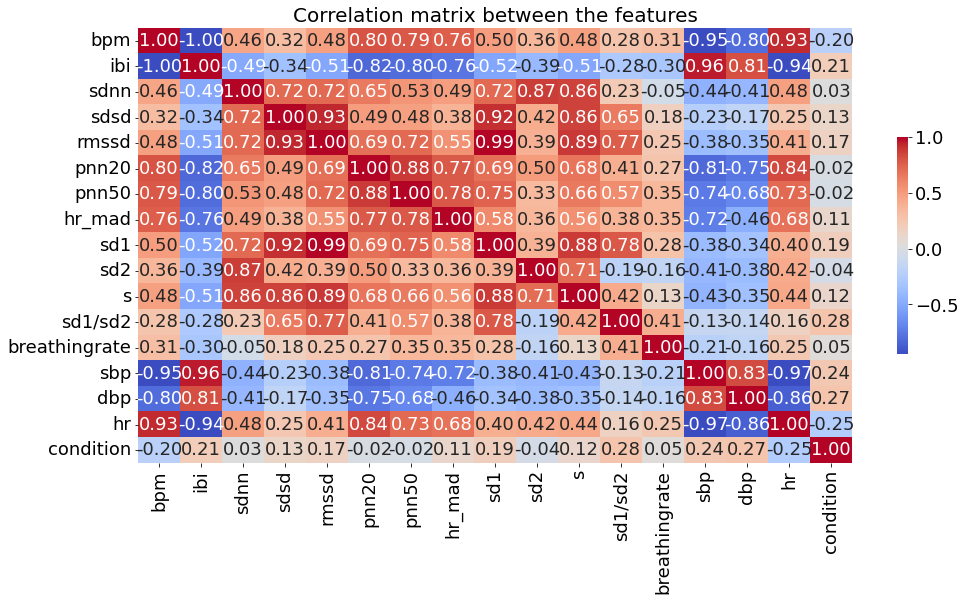

In [ ]:
# CORRELATION MATRIX
import seaborn as sns

datapd = pd.DataFrame.from_dict(data)
correlation_matrix = datapd.corr()
ax = sns.heatmap(correlation_matrix, annot=True,fmt='.2f', cmap ='coolwarm', cbar_kws={"shrink": .5}, robust=True)
plt.title('Correlation matrix between the features', fontsize=20)
plt.show()

## Systolic Blood Pressure Correlation and p-value

In [ ]:
corr_df_sbp = pd.DataFrame(columns=['r','p', 'significance'])
for col in datapd:
  if col not in ['sbp', 'dbp', 'hr', 'condition']:
    r, p = pearsonr(datapd.sbp, datapd[col])
    sig = '✅' if p < 0.05 else '❌'
    corr_df_sbp.loc[col] = [round(r,4), round(p,4), sig]

corr_df_sbp

,r,p,significance
bpm,-0.9521,0.0000,✅
ibi,0.9557,0.0000,✅
sdnn,-0.4444,0.0178,✅
sdsd,-0.2262,0.2471,❌
rmssd,-0.3807,0.0457,✅
pnn20,-0.8113,0.0000,✅
pnn50,-0.7356,0.0000,✅
hr_mad,-0.7174,0.0000,✅
sd1,-0.3826,0.0445,✅
sd2,-0.4055,0.0323,✅


## Diastolic Blood Pressure Correlation and p-values

In [ ]:
corr_df_dbp = pd.DataFrame(columns=['r','p', 'significance'])
for col in datapd:
  if col not in ['sbp', 'dbp', 'hr', 'condition']:
    r, p = pearsonr(datapd.dbp, datapd[col])
    sig = '✅' if p < 0.05 else '❌'
    corr_df_dbp.loc[col] = [round(r,4), round(p,4), sig]

corr_df_dbp

,r,p,significance
bpm,-0.7956,0.0000,✅
ibi,0.8107,0.0000,✅
sdnn,-0.4090,0.0307,✅
sdsd,-0.1663,0.3976,❌
rmssd,-0.3475,0.0700,❌
pnn20,-0.7493,0.0000,✅
pnn50,-0.6756,0.0001,✅
hr_mad,-0.4557,0.0148,✅
sd1,-0.3364,0.0801,❌
sd2,-0.3817,0.0450,✅


## Heart Rate Correlation and p-values

In [ ]:
corr_df_hr = pd.DataFrame(columns=['r','p', 'significance'])
for col in datapd:
  if col not in ['sbp', 'dbp', 'hr', 'condition']:
    r, p = pearsonr(datapd.hr, datapd[col])
    sig = '✅' if p < 0.05 else '❌'
    corr_df_hr.loc[col] = [round(r,4), round(p,4), sig]

corr_df_hr

,r,p,significance
bpm,0.9312,0.0000,✅
ibi,-0.9436,0.0000,✅
sdnn,0.4778,0.0101,✅
sdsd,0.2527,0.1945,❌
rmssd,0.4144,0.0284,✅
pnn20,0.8374,0.0000,✅
pnn50,0.7250,0.0000,✅
hr_mad,0.6812,0.0001,✅
sd1,0.4050,0.0325,✅
sd2,0.4247,0.0243,✅


## Condition (Lying/Standing) Correlation and p-value

In [ ]:
print(len(data['condition']))

28


In [ ]:
corr_df_con = pd.DataFrame(columns=['r','p', 'significance'])
for col in datapd:
  if col not in ['sbp', 'dbp', 'hr', 'condition']:
    r, p = pearsonr(datapd.condition, datapd[col])
    sig = '✅' if p < 0.05 else '❌'
    corr_df_con.loc[col] = [round(r,4), round(p,4), sig]

corr_df_con

,r,p,significance
bpm,-0.2024,0.3017,❌
ibi,0.2089,0.2861,❌
sdnn,0.0285,0.8857,❌
sdsd,0.1314,0.5051,❌
rmssd,0.1683,0.3920,❌
pnn20,-0.0151,0.9393,❌
pnn50,-0.0186,0.9250,❌
hr_mad,0.1124,0.5689,❌
sd1,0.1929,0.3255,❌
sd2,-0.0360,0.8555,❌


## Blood pressure and BPM through time

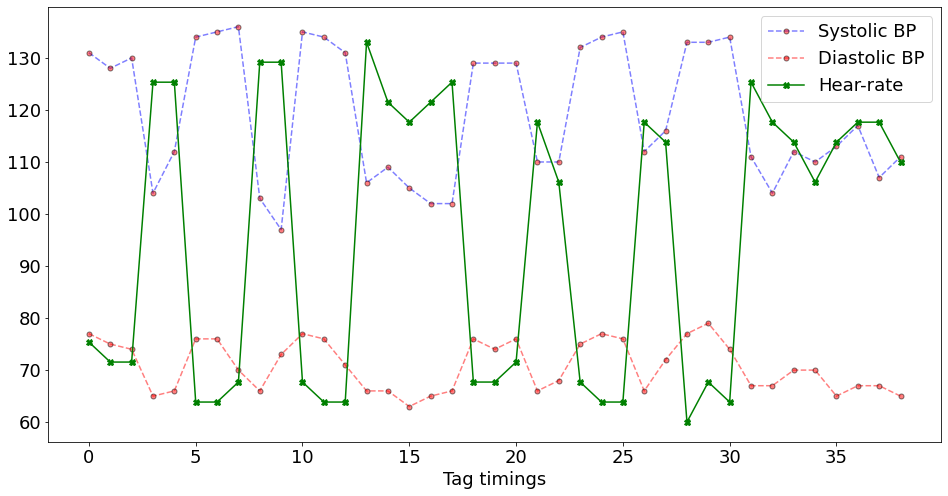

In [ ]:
dom_hr = max(hr) - min(hr)
dom_bp = max(sbp) - min(dbp)
bias = np.mean(sbp+dbp)/2
ratio = dom_bp/dom_hr

plt.figure(1)
plt.plot(sbp, linestyle='--', color = 'blue', alpha=0.5, marker="o", markersize=5, markerfacecolor="red", markeredgecolor="black", label='Systolic BP')
plt.plot(dbp, linestyle='--', color = 'red', alpha=0.5, marker="o", markersize=5, markerfacecolor="red", markeredgecolor="black", label='Diastolic BP')
plt.plot(ratio*(hr-np.mean(hr))+bias, linestyle='-', color='green', marker='X', label='Hear-rate')
plt.xlabel("Tag timings")
plt.legend()


## Accelerometer and BVP

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


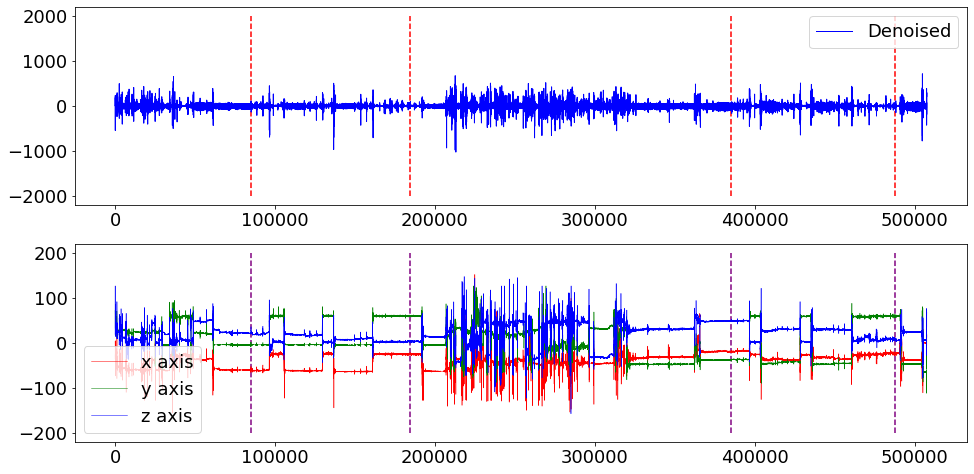

In [ ]:
#%% BVP AND ACCELEROMETER OVER TIME

fig = plt.figure()
ax1 = plt.subplot(211)
ax2 = plt.subplot(212, sharex = ax1)

ax1.plot(bvp, color='b', linewidth=1, label='Denoised')
ax1.vlines(x = [inds[0], inds[17], inds[18], inds[-1]], ymin=-2000, ymax=2000, colors = 'red', ls='--')

#axes[0].xlim(t_window[0], t_window[-1])
ax1.legend()

acc_x_resampled = resample_frequency(acc_x, None, 64, 32)
acc_y_resampled = resample_frequency(acc_y, None, 64, 32)
acc_z_resampled = resample_frequency(acc_z, None, 64, 32)


ax2.plot(acc_x_resampled, color='r', linewidth=0.5, label='x axis')
ax2.plot(acc_y_resampled, color='g', linewidth=0.5, label='y axis')
ax2.plot(acc_z_resampled, color='b', linewidth=0.5, label='z axis')
ax2.vlines(x = [inds[0], inds[17], inds[18], inds[-1]], ymin=-200, ymax=200, colors = 'purple', ls='--')

#plt.xlim(t_window[0], t_window[-1])
ax2.legend()

